# DISCRETISATION DES VARIABLES CONTINUES 

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns

In [4]:
os.chdir(r"C:\Users\luc-a\Desktop\livre alliage")

In [4]:
#import data
BaseCout=pd.read_csv("baseCout.csv",delimiter=";")
BaseFreq=pd.read_csv("baseFREQ.csv",delimiter=";",error_bad_lines=False)
data=pd.read_csv("BASE_DEF.csv",)

In [5]:
BaseFreq.shape,BaseCout.shape, data.shape

((39075, 22), (6515, 18), (39075, 24))

In [6]:
BaseCout.head()

,numeropol,debut_pol,fin_pol,freq_paiement,langue,type_prof,alimentation,type_territoire,utilisation,presence_alarme,marque_voiture,sexe,exposition,age,duree_permis,age_vehicule,i,coutsin
0,6,1995-03-01,1996-02-27,annuel,A,Technicien,Carnivore,Urbain,Travail-occasionnel,oui,NISSAN,M,0.994521,42,21,19,1,279.583851
1,27,1997-04-12,1997-07-10,mensuel,F,Technicien,Carnivore,Semi-urbain,Travail-occasionnel,oui,HONDA,M,0.243836,51,22,24,1,814.167702
2,27,1999-04-12,2000-04-11,mensuel,F,Technicien,Carnivore,Semi-urbain,Travail-occasionnel,non,HONDA,M,1.000000,53,24,16,1,136.863354
3,76,1999-03-29,2000-03-28,mensuel,F,Technicien,Carnivore,Urbain,Travail-occasionnel,non,FORD,F,1.000000,42,21,15,1,608.726708
4,76,2001-03-29,2002-03-28,mensuel,F,Technicien,Carnivore,Urbain,Travail-occasionnel,non,FORD,F,0.997260,44,23,15,1,18687.434783


In [7]:
BaseFREQ.head()

NameError: name 'BaseFREQ' is not defined

In [8]:
data.head()

,Unnamed: 0,numeropol,debut_pol,fin_pol,freq_paiement,langue,type_prof,alimentation,type_territoire,utilisation,...,cout2,cout3,cout4,nbsin,exposition,cout,age,duree_permis,annee_vehicule,coutsin
0,0,3,1995-09-14,1996-04-24,mensuel,F,Technicien,V�g�tarien,Urbain,Travail-quotidien,...,NaN,NaN,NaN,0,0.610959,NaN,29,10,1989,0.000000
1,1,3,1996-04-25,1996-12-23,mensuel,F,Technicien,V�g�tarien,Urbain,Travail-quotidien,...,NaN,NaN,NaN,0,0.663014,NaN,30,11,1989,0.000000
2,2,6,1995-03-01,1996-02-27,annuel,A,Technicien,Carnivore,Urbain,Travail-occasionnel,...,NaN,NaN,NaN,1,0.994521,279.58,42,21,1994,279.583851
3,3,6,1996-03-01,1997-01-14,annuel,A,Technicien,Carnivore,Urbain,Travail-occasionnel,...,NaN,NaN,NaN,0,0.873973,NaN,43,22,1994,0.000000
4,4,6,1997-01-15,1997-01-31,annuel,A,Technicien,Carnivore,Urbain,Travail-occasionnel,...,NaN,NaN,NaN,0,0.043836,NaN,44,23,1994,0.000000


In [9]:
data.columns

Index(['Unnamed: 0', 'numeropol', 'debut_pol', 'fin_pol', 'freq_paiement',
       'langue', 'type_prof', 'alimentation', 'type_territoire', 'utilisation',
       'presence_alarme', 'marque_voiture', 'sexe', 'cout1', 'cout2', 'cout3',
       'cout4', 'nbsin', 'exposition', 'cout', 'age', 'duree_permis',
       'annee_vehicule', 'coutsin'],
      dtype='object')

In [10]:
BaseFreq.columns

Index(['numeropol', 'debut_pol', 'fin_pol', 'freq_paiement', 'langue',
       'type_prof', 'alimentation', 'type_territoire', 'utilisation',
       'presence_alarme', 'marque_voiture', 'sexe', 'cout1', 'cout2', 'cout3',
       'cout4', 'nbsin', 'exposition', 'cout', 'age', 'duree_permis',
       'annee_vehicule'],
      dtype='object')

In [11]:
BaseCout.columns

Index(['numeropol', 'debut_pol', 'fin_pol', 'freq_paiement', 'langue',
       'type_prof', 'alimentation', 'type_territoire', 'utilisation',
       'presence_alarme', 'marque_voiture', 'sexe', 'exposition', 'age',
       'duree_permis', 'age_vehicule', 'i', 'coutsin'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39075 entries, 0 to 39074
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       39075 non-null  int64  
 1   numeropol        39075 non-null  int64  
 2   debut_pol        39075 non-null  object 
 3   fin_pol          39075 non-null  object 
 4   freq_paiement    39075 non-null  object 
 5   langue           39075 non-null  object 
 6   type_prof        39075 non-null  object 
 7   alimentation     39075 non-null  object 
 8   type_territoire  39075 non-null  object 
 9   utilisation      39075 non-null  object 
 10  presence_alarme  39075 non-null  object 
 11  marque_voiture   39075 non-null  object 
 12  sexe             39075 non-null  object 
 13  cout1            5689 non-null   float64
 14  cout2            732 non-null    float64
 15  cout3            86 non-null     float64
 16  cout4            8 non-null      float64
 17  nbsin       

In [13]:
#drop first column and numeropol
data=data.drop(['Unnamed: 0','numeropol'], axis=1)

In [14]:
data.head()

,debut_pol,fin_pol,freq_paiement,langue,type_prof,alimentation,type_territoire,utilisation,presence_alarme,marque_voiture,...,cout2,cout3,cout4,nbsin,exposition,cout,age,duree_permis,annee_vehicule,coutsin
0,1995-09-14,1996-04-24,mensuel,F,Technicien,V�g�tarien,Urbain,Travail-quotidien,non,VOLKSWAGEN,...,NaN,NaN,NaN,0,0.610959,NaN,29,10,1989,0.000000
1,1996-04-25,1996-12-23,mensuel,F,Technicien,V�g�tarien,Urbain,Travail-quotidien,non,VOLKSWAGEN,...,NaN,NaN,NaN,0,0.663014,NaN,30,11,1989,0.000000
2,1995-03-01,1996-02-27,annuel,A,Technicien,Carnivore,Urbain,Travail-occasionnel,oui,NISSAN,...,NaN,NaN,NaN,1,0.994521,279.58,42,21,1994,279.583851
3,1996-03-01,1997-01-14,annuel,A,Technicien,Carnivore,Urbain,Travail-occasionnel,oui,NISSAN,...,NaN,NaN,NaN,0,0.873973,NaN,43,22,1994,0.000000
4,1997-01-15,1997-01-31,annuel,A,Technicien,Carnivore,Urbain,Travail-occasionnel,oui,NISSAN,...,NaN,NaN,NaN,0,0.043836,NaN,44,23,1994,0.000000


In [15]:
def missing_values_table(df):
    #total missing values
    miss_val = df.isnull().sum()
    
    #Percentage of missing values 
    mis_val_percent = 100* df.isnull().sum() / len(df)
    
    #make a table with the results
    mis_val_table=pd.concat([miss_val,mis_val_percent],axis=1)
    
    #rename the columns 
    mis_val_table_ren_columns=mis_val_table.rename(columns={0 : 'Missing Values', 1: '% of Total Values'})
    
    #sort the table by percentage of missing descending 
    mis_val_table_ren_columns=mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

    return mis_val_table_ren_columns


In [16]:
missing_values_table(data)

,Missing Values,% of Total Values
cout4,39067,100.0
cout3,38989,99.8
cout2,38343,98.1
cout1,33386,85.4
cout,33386,85.4


In [17]:
list(set(data.dtypes.tolist()))

[dtype('O'), dtype('int64'), dtype('float64')]

In [18]:
#select num variable 
data_num=data.select_dtypes(["int64","float64"])
#select variable without cout,nb_sin, exposition
var=data_num.columns[data_num.columns.str.startswith("c")].tolist()
var.extend(["nbsin","exposition"])
data_to_discretize=data_num.drop(var,axis=1)
data_to_discretize.head()

,age,duree_permis,annee_vehicule
0,29,10,1989
1,30,11,1989
2,42,21,1994
3,43,22,1994
4,44,23,1994


## Discrétisation non-supervisée 

On se base sur la structure de la variable pour faire une `bonne` discrétisation.
L'idée de `bonne` discrétisation doit être prise avec des pincettes 
   - Intuitivement ou en se référant à un cas classique de classification, on veut des classes ou des partitions de notre variable qui soit homogène et séparés ( inertie intra classe faible et inertie interclasse élevée)
   - on peut également prendre d'autres critères en compte comme le nombre d'individus dans chaque classe,équirépartion ( meme amplitude,...)
   
  **Deux questions à répondre :**
   1. Quel le nombres de classes à considérer ?
   2. Quelles sont les bornes considirées ?
   
Pour la première question il existe des formules pour les déterminer à l'aveugle mais ces techniques supposent que la distribution de la variable soit **gaussienne**.

- **Brook-carruthers**
$$ 5 \times \log_{10}(N)$$
- **HuntsBerger**
$$ 1 + 3,332\log_{10}(N)$$
- **Sturges**
$$ \log_2(N + 1)$$
- **Scoot** 
$$ \frac{max(X)- min(X)}{3.5 \times \sigma \times n^{-1/3}} $$
$$h = \sigma \sqrt[3]{\frac{24 * \sqrt{\pi}}{n}}$$
- **Freedman-Diaconis**
$$ \frac{max(X)- min(X)}{2 \times IQ \times n^{-1/3}} $$


les deux dernières formules ont l'air plus performante car elle mette en jeu plusieurs caractéristiques de la distribution ( moyenne, écart-types, min , max ) mais cependant elles ont l'air plus sensible au valeurs abérantes

Numpy fournit des estimateurs "amélioriées" capable de bien se comporter sur des données non-normales (doane)
- **Code + Formule**
https://github.com/numpy/numpy/blob/v1.21.0/numpy/lib/histograms.py#L470-L670
https://en.wikipedia.org/wiki/Histogram#Scott's_normal_reference_rule

$$n_h = 1 + \log_{2}(n) +
                        \log_{2}(1 + \frac{|g_1|}{\sigma_{g_1}})$$
                        
avec $g_1 = mean[(\frac{x - \mu}{\sigma})^3]$ et $\sigma_{g_1} = \sqrt{\frac{6(n - 2)}{(n + 1)(n + 3)}}$


### Représentation des variables et resumés statistiques 

In [19]:

data_to_discretize.reset_index(inplace=True)
var_to_discretize=data_to_discretize.columns[1:].tolist()

In [20]:
# Update as needed
#n_rows=2
#n_cols=20

# Create the subplots
#fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(100, 100))
#for i, column in enumerate(train_num):
    #sns.histplot(train_num[column], ax=axes[i // n_cols, i % n_cols]).set_title(column)

In [ ]:
fig, ax = plt.subplots(round(len(var_to_discretize) / 3), 3, figsize = (18, 12))
for i, ax in enumerate(fig.axes):
    if i < len(var_to_discretize):
        sns.scatterplot(x="index",y=var_to_discretize[i], data=data_to_discretize, ax=ax)

Il y a trop d'observation, il est difficile de se faire une idée de la structure des variables pour faire une hypothèse sur le nombre de classe adéquate

In [ ]:
fig, ax = plt.subplots(round(len(var_to_discretize) / 3), 3, figsize = (18, 12))
for i, ax in enumerate(fig.axes):
    if i < len(var_to_discretize):
        sns.swarmplot(data_to_discretize[var_to_discretize[i]],ax=ax)

In [ ]:
sns.swarmplot(x=data_to_discretize[var_to_discretize[1]])

In [21]:
#summary statistics
summary=data_to_discretize.describe()
#add relative standard deviation
summary.loc["rsd"]=(summary.loc['std']/summary.loc['mean'])*100
summary=summary.iloc[:,1:]
summary

,age,duree_permis,annee_vehicule
count,39075.000000,39075.000000,39075.000000
mean,45.590633,22.151017,1994.363225
std,12.057312,9.112956,4.439719
min,18.000000,0.000000,1945.000000
25%,36.000000,15.000000,1991.000000
50%,44.000000,22.000000,1995.000000
75%,54.000000,30.000000,1998.000000
max,87.000000,77.000000,2003.000000
rsd,26.446905,41.140122,0.222613


In [22]:
data_to_discretize.annee_vehicule.unique()

array([1989, 1994, 1998, 2001, 1997, 1992, 1990, 1996, 1991, 1987, 1988,
       1999, 1993, 2003, 1984, 2000, 1995, 1986, 1982, 2002, 1983, 1985,
       1981, 1974, 1979, 1977, 1980, 1975, 1971, 1967, 1978, 1976, 1952,
       1970, 1969, 1945, 1959, 1966], dtype=int64)

### Estimations du nombres de classes 
Tableau en ligne les méthodes d'estimations et en colonnes les variables 

In [23]:
import numpy as np
from scipy import stats

def FD(x):
    """ Freedman Diaconis Estimator"""
    n = len(x)
    IQ = np.percentile(x,75)-np.percentile(x,25)
    b=(2*IQ)/ np.power(n, 1/3)
    return (np.max(x)-np.min(x)) / b

def BC(x):
    """Brooks-Carruthers Estimator"""
    n = len(x)
    return 5*np.log10(n)

def HB(x):
    """Hunsberger Estimator"""
    n=len(x)
    return 1+3.332*np.log10(n)

def Sc(x):
    """Scott Estimator"""
    n = len(x)
    b=(3.49*np.std(x)) / np.power(n, 1/3)
    return (np.max(x)-np.min(x)) / b

def St(x):
    """Sturges Estimator"""
    n = len(x)
    return np.log2(n+1)

def doane(x):
    """ Doane Estimator,An improved version of Sturges,
    better estimates for non-normal datasets"""
    n = len(x)
    g1 = stats.skew(x)
    sigma_g1 = np.sqrt(6 * (n - 2) / ((n + 1) * (n + 3)))
    return  1 + np.log2(n) + np.log2(1 + np.abs(g1) / sigma_g1)

In [24]:
def summary_estimate(df,var_to_discretize):
    estimators={"Brooks-Carruthers Estimator":BC,
                "Hunsberger Estimator":HB,
                "Sturges Estimator":St,
                "Scott Estimator":Sc,
                "Freedman Diaconis Estimator":FD,
               "Doane Estimator":doane}
    c=len(estimators.keys())
    l=len(var_to_discretize)
    m=np.zeros((l,c))
    for i in range(len(var_to_discretize)):
        for j,f in enumerate(estimators.values()):
            m[i,j]=int(f(df[var_to_discretize[i]])+1)
    
    summary=pd.DataFrame(m,columns=estimators.keys(),index=var_to_discretize,dtype='int32')
    return summary


In [25]:
a=summary_estimate(data_num,var_to_discretize[:-1])
a

,Brooks-Carruthers Estimator,Hunsberger Estimator,Sturges Estimator,Scott Estimator,Freedman Diaconis Estimator,Doane Estimator
age,23,17,16,56,66,22
duree_permis,23,17,16,83,88,18


### Estimations du nombres de classes et construction des classes

In [ ]:
#number of bins
bins=16

#### Méthodes des quantiles 

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
Discretizor=KBinsDiscretizer(n_bins=bins,encode="ordinal",strategy="quantile")
Discretizor.fit_transform(data_to_discretize.iloc[:,1:])

Sklearn fournit une fonction pour discrétiser avec un nombre de classes fixes
mais il renvoie les dummies variables plutot que le tableau avec les classes 
Difficile donc d'interprèter les classes alors!

In [ ]:
def quantile_method(df,var_to_discretize,n_bins):
    new={}
    print()
    for i in range(len(var_to_discretize)-1):
        quantiles = np.linspace(0, 100, n_bins[i] + 1)
        bornes=np.percentile(df[var_to_discretize[i]],quantiles)
        new[var_to_discretize[i]]=pd.cut(data_num[var_to_discretize[i]],bornes)
    return pd.DataFrame(new)

In [ ]:
a=summary_estimate(data_to_discretize,var_to_discretize[:-1])
quantile_method(data_to_discretize,var_to_discretize,n_bins=a["Sturges Estimator"])

#### Méthodes des amplitudes 

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
Discretizor=KBinsDiscretizer(n_bins=bins,encode="ordinal",strategy="uniform")
Discretizor.fit_transform(data_to_discretize.iloc[:,1:])

In [ ]:
def amplitude_method(df,var_to_discretize,n_bins):
    new={}
    for i in range(len(var_to_discretize)-1):
        new[var_to_discretize[i]]=pd.cut(data_num[var_to_discretize[i]],n_bins[i])
    return pd.DataFrame(new)

In [ ]:
a=summary_estimate(data_to_discretize,var_to_discretize[:-1])
amplitude_method(data_to_discretize,var_to_discretize,n_bins=a["Sturges Estimator"])

#### Méthodes des moyennes emboitées

In [ ]:
def moyenne_emboitées(df,var)

In [ ]:
temp=data_num[var_to_discretize[0]].tolist()

In [ ]:
temp=sorted(temp)
m=np.mean(temp)
bornes=[m]
for i in range(bins):
    m1,m2=split_mean(temp,m)
    bornes.append()

In [ ]:
def split_mean(x,m):
    return (np.mean(x[:round(m)]),np.mean(x[round(m):]))

In [ ]:
temp=sorted(temp)
split_mean(temp,30.5)

#### Méthodes des différences relatives 

In [ ]:
temp=data_num[var_to_discretize[1]].sort_values().reset_index(drop=True)
rd=temp.diff(periods=1)[1:]/temp[:-1]
rd=rd[~rd.isna()]

bornes=temp[:-1][rd>0.5]
bornes

In [ ]:
temp[:-1]

In [ ]:
rd

In [ ]:
rd

Cette méthode peut fonction pour des variables bien dispersées à oublier dans notre cas 

#### Arbre de régression

#### Classification Ascendante hiérarchique (CAH)

In [8]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data_num[var_to_discretize[0]], method = 'ward'))

NameError: name 'data_num' is not defined

In [7]:
dendrogram

NameError: name 'dendrogram' is not defined

#### Kmeans

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
Discretizor=KBinsDiscretizer(n_bins=bins,encode="ordinal",strategy="kmeans")
Discretizor.fit_transform(data_to_discretize.iloc[:,1:])

## Discrétisation supervisée 

### Méthode Livre Charpentier Actuariat avec R

In [31]:
age=data_num['age']

In [32]:
age=sorted(age.unique())
k = 5
classe1 =data["nbsin"]

[18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87]

In [10]:
data.columns

Index(['Unnamed: 0', 'numeropol', 'debut_pol', 'fin_pol', 'freq_paiement',
       'langue', 'type_prof', 'alimentation', 'type_territoire', 'utilisation',
       'presence_alarme', 'marque_voiture', 'sexe', 'cout1', 'cout2', 'cout3',
       'cout4', 'nbsin', 'exposition', 'cout', 'age', 'duree_permis',
       'annee_vehicule', 'coutsin'],
      dtype='object')

In [14]:
import pandas as pd 
data=data=pd.read_csv("BASE_DEF.csv")
data_to_discretize=data[["age","duree_permis"]]

#Nombres de classes
bins=5

In [16]:
#summary statistics
summary=data_to_discretize.describe()
#add relative standard deviation
summary.loc["rsd"]=(summary.loc['std']/summary.loc['mean'])*100
summary



,age,duree_permis
count,39075.000000,39075.000000
mean,45.590633,22.151017
std,12.057312,9.112956
min,18.000000,0.000000
25%,36.000000,15.000000
50%,44.000000,22.000000
75%,54.000000,30.000000
max,87.000000,77.000000
rsd,26.446905,41.140122


In [42]:
#Stratégie : Uniforme
from sklearn.preprocessing import KBinsDiscretizer
Discretizor=KBinsDiscretizer(n_bins=bins,encode="ordinal",strategy="uniform")
Discretizor.fit_transform(data_to_discretize)

#meilleur vue du résultat
df_disc_uni=pd.DataFrame(Discretizor.fit_transform(data_to_discretize),columns=data_to_discretize.columns,dtype="int")
df_disc_uni.head()

,age,duree_permis
0,0,0
1,0,0
2,1,1
3,1,1
4,1,1


In [41]:
#stratégie : quantile
from sklearn.preprocessing import KBinsDiscretizer
Discretizor=KBinsDiscretizer(n_bins=bins,encode="ordinal",strategy="quantile")
Discretizor.fit_transform(data_to_discretize)

#meilleur vue du résultat
df_disc_qt=pd.DataFrame(Discretizor.fit_transform(data_to_discretize),columns=data_to_discretize.columns,dtype="int")
df_disc_qt.head()

,age,duree_permis
0,0,0
1,0,0
2,2,2
3,2,2
4,2,2


In [49]:
#stratégie : Kmeans
from sklearn.preprocessing import KBinsDiscretizer
Discretizor=KBinsDiscretizer(n_bins=bins,encode="ordinal",strategy="kmeans")
Discretizor.fit_transform(data_to_discretize)

#meilleur vue du résultat
df_disc_kmeans=pd.DataFrame(Discretizor.fit_transform(data_to_discretize),columns=data_to_discretize.columns,dtype="int")
df_disc_kmeans.head()

,age,duree_permis
0,0,0
1,0,0
2,1,1
3,1,1
4,1,1


In [64]:
from sklearn.preprocessing  import FunctionTransformer

#intervalles des classes et noms
bins_age= [18,20,30,50,60,np.inf]
bins_duree_permis= [0,15,22,30,np.inf]
labels_age = ['18-20', '20-30','30-50','50-60', '60-plus']
labels_duree_permis = ['0-15', '15-22','22-30','30-plus']
bins=[bins_age,bins_duree_permis]
labels=[labels_age,labels_duree_permis]

df_disc=data_to_discretize.copy() #copie du tableau à discrétiser
var_to_discretize=data_to_discretize.columns
for bins,labels,var in zip(bins,labels,var_to_discretize):
    transformer = FunctionTransformer( pd.cut, kw_args={'bins': bins , 'labels': labels , 'retbins': False})
    df_disc[var]=transformer.fit_transform(df_disc[var])

#Affichage des 5 premières lignes
df_disc.head()

,age,duree_permis
0,20-30,0-15
1,20-30,0-15
2,30-50,15-22
3,30-50,15-22
4,30-50,22-30


18

In [26]:
from sklearn.datasets import load_iris

In [27]:
exemple=load_iris()

In [58]:
name_columns=exemple.feature_names
name_columns.append("target")

In [59]:
data1=pd.DataFrame(np.concatenate((exemple.data,exemple.target.reshape(150,1)),axis=1),columns=name_columns)

In [46]:
exemple.data.shape

(150, 4)

In [42]:
u=exemple.target

In [24]:
data1=pd.DataFrame(exemple.data,columns=exemple.feature_names)

In [100]:
len(var)

30

Text(0, 0.5, 'Variable à discretiser')

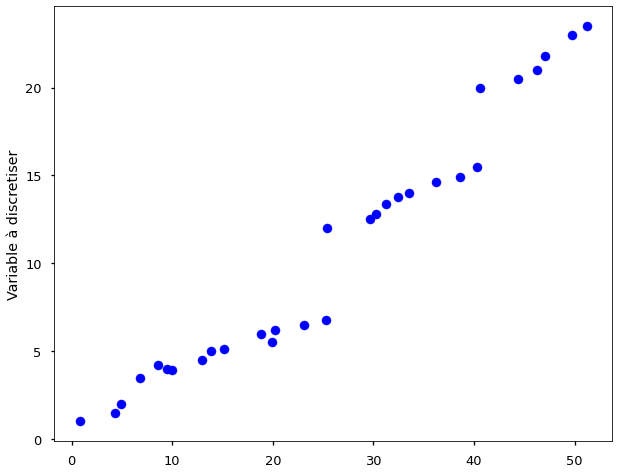

In [76]:
var=[1,1.5,2,3.5,3.9,4,4.2,4.5,5,5.1,5.5,6,6.2,6.5,6.8,12,12.5,12.8,13.4,13.8,14,14.6,14.9,15.5,20,20.5,21,21.8,23,23.5]
plt.style.use('seaborn-talk')
plt.figure(figsize=(10,8))
plt.scatter(x,var,c="blue")
plt.ylabel("Variable à discretiser")

In [134]:
x1=np.arange(1,31)
x1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [65]:
x=np.linspace(1,50,30)+np.random.randn(30,1).flatten()
temp=np.array([0,1,2])
y=np.repeat(temp, [10,13,7], axis=0)

In [66]:
dic={"Variable à discretiser":x,"groupes":y}

In [154]:
x.shape

(30,)

In [68]:
data2=pd.DataFrame(dic)

In [69]:
data2.iloc[1:3,1]=1

In [70]:
data2

,Variable à discretiser,groupes
0,0.808633,0
1,4.353758,1
2,4.964685,1
3,6.841890,0
4,9.954679,0
5,9.520480,0
6,8.563594,0
7,12.978699,0
8,13.834237,0
9,15.133537,0


In [71]:
plt.style.use('seaborn-talk')
plt.figure(figsize=(10,8))
plt.scatter(x1,x,c=y,label={0:})
for i, txt in enumerate(s):
    plt.annotate(txt, (x1[i], x[i]))
plt.xlabel("variable à discretiser")
plt.legend()

SyntaxError: invalid syntax (<ipython-input-71-96cd4e59de7d>, line 3)

<AxesSubplot:ylabel='Variable à discretiser'>

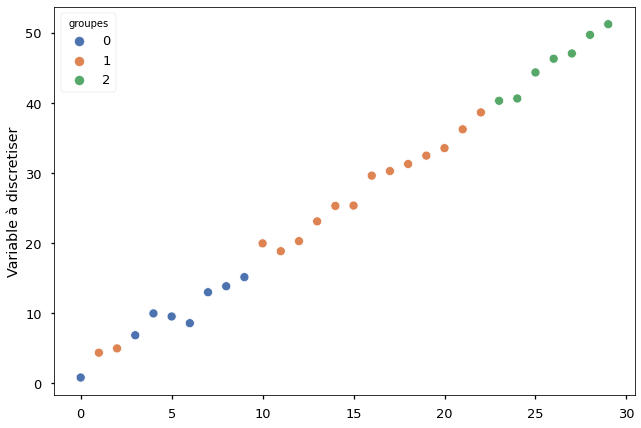

In [79]:
sns.scatterplot(x=data2.index,y="Variable à discretiser",hue="groupes",palette="deep",data=data2)